In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [24]:
df = pd.read_csv('../dataset/dataset.csv')

In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
df = df.drop(columns=['Over18','StandardHours','EmployeeNumber','EmployeeCount'])

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [30]:
df['Attrition'] = df['Attrition'].str.strip().str.capitalize()
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [31]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [32]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
            'JobRole', 'MaritalStatus', 'OverTime']
num_cols = [col for col in X.columns if col not in cat_cols]

In [33]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [34]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,False,False,False,True,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,92,2,1,3,2090,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,...,False,False,False,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,...,True,False,False,False,False,False,False,True,False,False


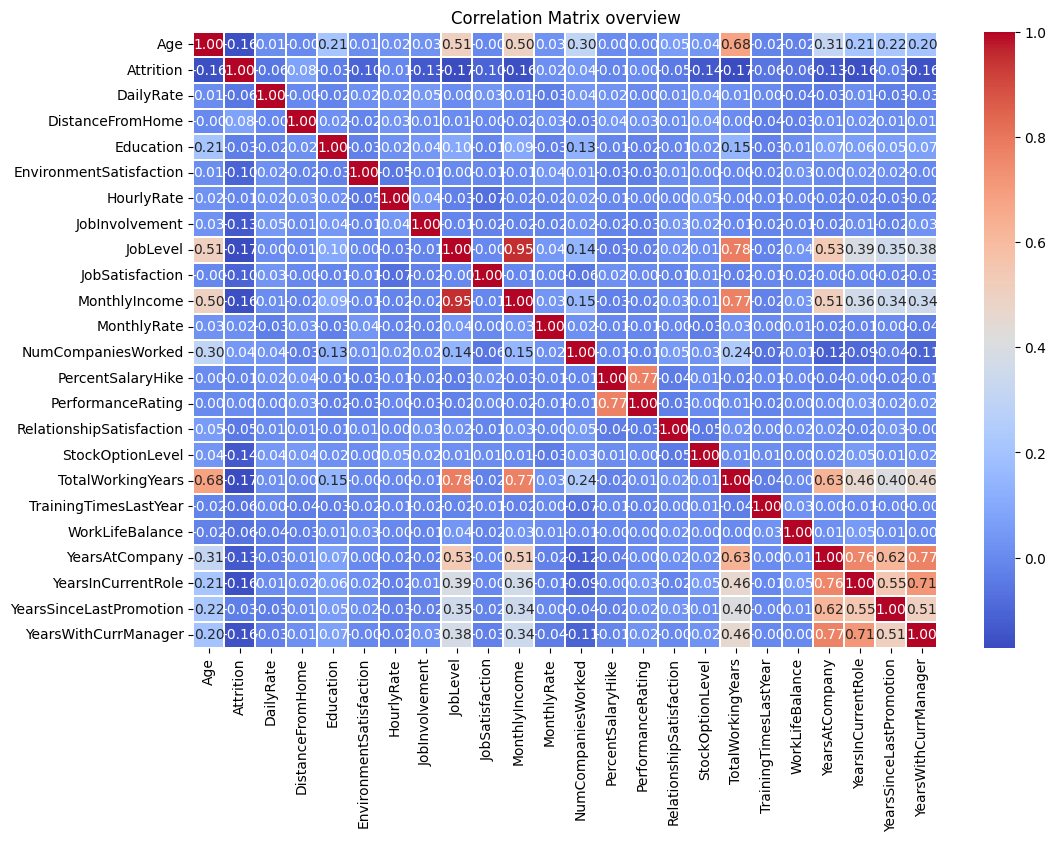

In [35]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',linewidths=0.1)
plt.title('Correlation Matrix overview')

plt.show()

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=42)

In [38]:
svc = SVC(kernel='linear')

In [39]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred = svc.predict(X_test)

Accuracy: 0.891156462585034
[[246   9]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



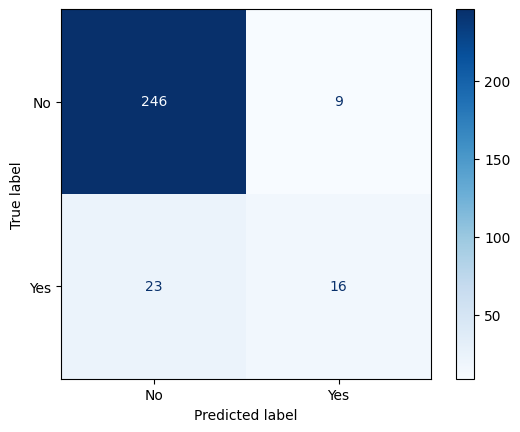

In [41]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))

In [42]:
param_grid = {'C': [0.1,0.01, 1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['linear']}

In [43]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [44]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.856 total time=   0.0s


[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.898 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.872 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.872 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.856 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.898 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.872 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.872 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.856 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.898 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [46]:
y_pred4 = grid.predict(X_test)

Accuracy: 0.891156462585034
[[248   7]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       255
           1       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



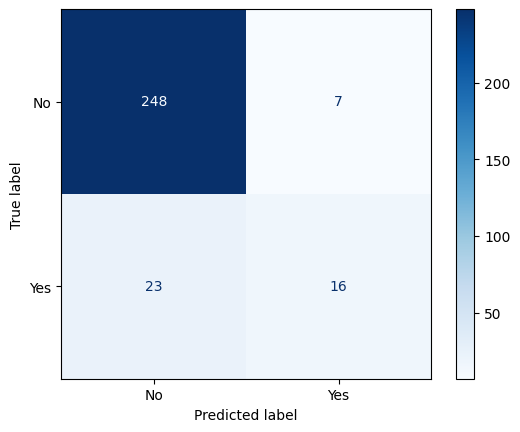

In [47]:
cm = confusion_matrix(y_test, y_pred4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No','Yes'])
disp.plot(cmap='Blues')

print("Accuracy:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))